In [42]:
import os
import json
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
def read_results(directory):
    contents = os.listdir(f'{directory}/rankings')
    results={}
    for c in contents:
        possible_subdir = f'{directory}/rankings/{c}'
        if os.path.isdir(possible_subdir):
            fs = os.listdir(possible_subdir)
            for fname in fs:
                if fname.endswith('json'):
                    with open(f'{possible_subdir}/{fname}','r') as inf:
                        results[c] = json.load(inf)
    return results

In [44]:
def hash_result(sres,ks):
    mp = {}
    for b in ['node_bindings','edge_bindings']:
        for qid,nodes in sres[b].items():
            if qid not in ks:
                continue
            nids = [n['id'] for n in nodes if not n['id'].startswith('connect') ]
            nids.sort()
            mp[qid] = nids
    j = json.dumps(mp,sort_keys=True)
    return hash(j),j

In [45]:
def extract_scores(xresults):
    scoremap = defaultdict(dict)
    rmap = {}
    keys = set()
    for tool, message in xresults.items():  
        qg = message['message']['query_graph']
        keys.update(qg['nodes'].keys())
        keys.update(qg['edges'].keys())
        for r in message['message']['results']:
            h,j = hash_result(r,keys)
            scoremap[h][tool] = r['score']
            rmap[h] = j
    return scoremap,rmap

In [69]:
def compare(dirname):
    results = read_results(dirname)
    scoremap,rmap = extract_scores(results)
    cmp = pd.DataFrame(scoremap)
    cmp = cmp.transpose()
    ranks = pd.DataFrame(index = cmp.index)
    cols = cmp.columns
    for c in cols:
        ranks[f'{c}_rank'] = cmp[c].rank(ascending=False)
    return results,cmp,ranks

In [71]:
results,cmp,ranks = compare('clinical_DCP')

In [72]:
cmp

,improving_agent,ranking_agent,ARAX
7179088916086773162,0.132144,0.267949,0.130435
-8438318089113906694,0.166740,0.268633,0.782609
8734029328832291106,0.286745,0.271378,0.956522
4146387695298930623,0.161479,0.272059,0.739130
-4917474002798554633,0.132144,0.272665,0.608696
-3006523345446516541,0.132144,0.271814,0.521739
7543339398334049009,0.174821,0.279633,0.565217
-5501973241691705763,0.132144,0.267949,0.695652
1430363372842529810,0.172304,0.275780,0.478261
-8612014295855901986,0.161401,0.301491,0.913043


In [73]:
ranks

,improving_agent_rank,ranking_agent_rank,ARAX_rank
7179088916086773162,17.0,18.5,22.0
-8438318089113906694,7.0,12.0,6.0
8734029328832291106,2.0,9.0,2.0
4146387695298930623,8.0,7.0,7.0
-4917474002798554633,17.0,6.0,10.0
-3006523345446516541,17.0,8.0,12.0
7543339398334049009,3.0,3.0,11.0
-5501973241691705763,17.0,18.5,8.0
1430363372842529810,4.0,4.0,13.0
-8612014295855901986,9.0,2.0,3.0


In [76]:
cmp.corr(method='pearson')

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.713708,0.580143
ranking_agent,0.713708,1.000000,0.451086
ARAX,0.580143,0.451086,1.000000


In [77]:
cmp.corr(method='spearman')

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.705306,0.531031
ranking_agent,0.705306,1.000000,0.623375
ARAX,0.531031,0.623375,1.000000


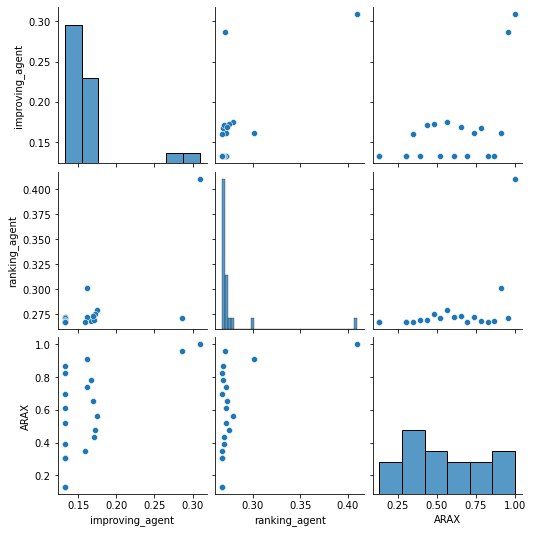

In [75]:
sns.pairplot(cmp)